[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/eltiotino/darwins/blob/master/20181018_rackpub_darwinex.ipynb)

In [1]:
%pylab inline
!pip install pandas-datareader
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import numpy.random as rng
import pandas_datareader.data as web
import numpy as np
import pandas as pd
!pip install ta
import ta
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as pdr
!pip install fix_yahoo_finance
!pip install ffn
import fix_yahoo_finance as yf
import ffn
yf.pdr_override() # Importamos Pandas Datareader y lo parcheamos para que funcione con Yahoo


Populating the interactive namespace from numpy and matplotlib


In [0]:

def strategy_performance(stock_ticker,periodo):  
    stock = pdr.get_data_yahoo(stock_ticker, start="2008-01-01", end="2018-10-01")         
    
    
    #Compute periodo -days breakout and mean.

    # 5-days high  
    stock['high'] = stock['Adj Close'].shift(1).rolling(window=periodo).max()  
    # 5-days low  
    stock['low'] = stock['Adj Close'].shift(1).rolling(window=periodo).min()  
    # 5-days mean  
    stock['avg'] = stock['Adj Close'].shift(1).rolling(window=periodo).mean()  

    #Entry Rules
    #When the closing price of the stock is greater than the high of past 55 days 
    #then we go long on the stock and 
    #when the closing price of the stock is less than the low of past 55 days 
    #then we go short on the stock.

    stock['long_entry'] = stock['Adj Close'] > stock.high         
    stock['short_entry'] = stock['Adj Close'] < stock.low  

    #stock['signal']=np.where(stock['Adj Close'] > stock.high,1,np.nan)
    
    #stock['signal']=np.where(stock['Adj Close'] < stock.low,1,stock['signal'])
    #Exit Rules

    #We will exit the positions if the stock price crosses the mean of past 55 days.

    stock['long_exit'] = stock['Adj Close'] < stock.avg  
    stock['short_exit'] = stock['Adj Close'] > stock.avg  

    #stock['signal']=np.where(stock['Adj Close'].shift() > stock.avg.shift(),0,stock['signal'])
    #stock['signal']=np.where(stock['Adj Close'].shift() < stock.avg.shift(),0,stock['signal'])

    
    #Positions
    
    #We will now store the entry and exit signal in a single column. Long position is indicated by 1, short position is indicated by -1 and exit or no position is indicated by 0. We will carry forward the previous position if no position exists for a time period using the fillna method.

    stock['positions_long'] = np.nan    
    stock.loc[stock.long_entry,'positions_long']= 1    
    stock.loc[stock.long_exit,'positions_long']= 0    
    
    stock['positions_short'] = np.nan    
    stock.loc[stock.short_entry,'positions_short']= 0    
    stock.loc[stock.short_exit,'positions_short']= 0    
  
    stock['Signal'] = stock.positions_long + stock.positions_short  
  
    stock= stock.fillna(method='ffill')   
    #stock=stock.fillna(0,inplace=True)
    
    #print(stock)
    #Strategy Returns
    
    #We have computed the log returns of the stock and multiplied with the Signal (1,-1 or 0) to get the strategy returns.

    daily_log_returns = np.log(stock['Adj Close']/stock['Adj Close'].shift(1))  
    daily_log_returns = daily_log_returns * stock.Signal.shift(1)  
  
    # Plot the distribution of 'daily_log_returns'  
    print (stock_ticker)  
    daily_log_returns.hist(bins=50)  
    plt.show()  
    return daily_log_returns.cumsum() 



[*********************100%***********************]  1 of 1 downloaded
MMM


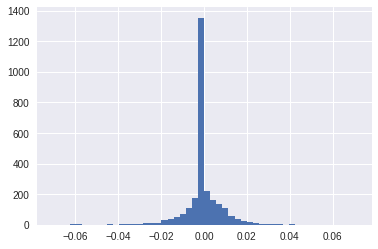

[*********************100%***********************]  1 of 1 downloaded
MMM


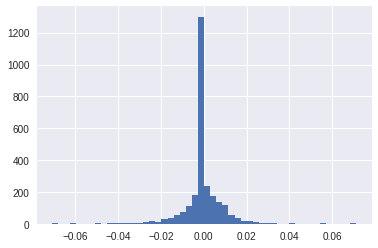

[*********************100%***********************]  1 of 1 downloaded
MMM


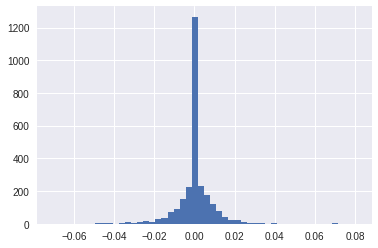

[*********************100%***********************]  1 of 1 downloaded
MMM


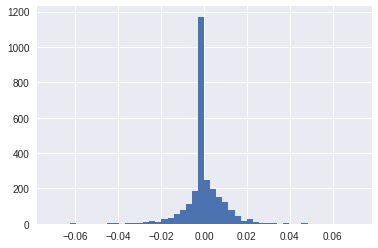

[*********************100%***********************]  1 of 1 downloaded
MMM


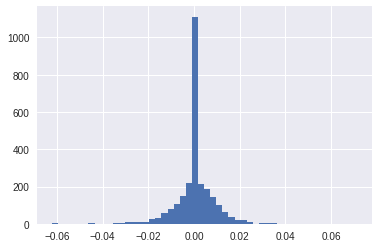

[*********************100%***********************]  1 of 1 downloaded
MMM


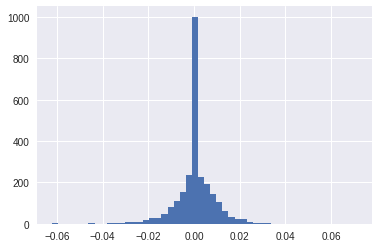

[*********************100%***********************]  1 of 1 downloaded
MMM


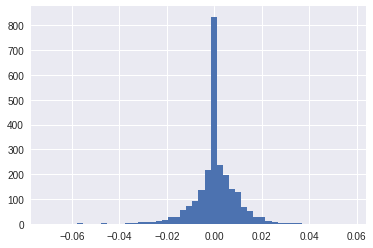

[*********************100%***********************]  1 of 1 downloaded
GOOG


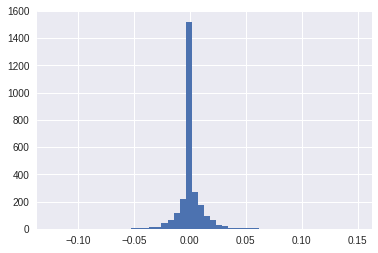

[*********************100%***********************]  1 of 1 downloaded
GOOG


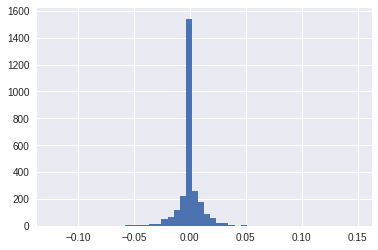

[*********************100%***********************]  1 of 1 downloaded
GOOG


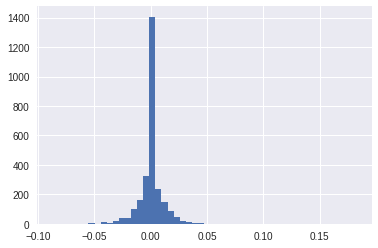

[*********************100%***********************]  1 of 1 downloaded
GOOG


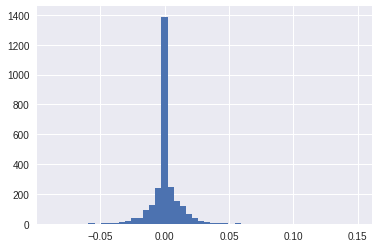

[*********************100%***********************]  1 of 1 downloaded
GOOG


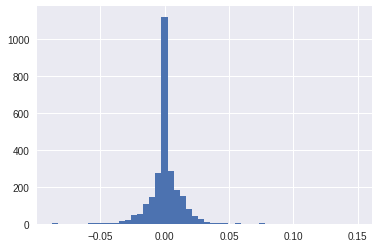

[*********************100%***********************]  1 of 1 downloaded
GOOG


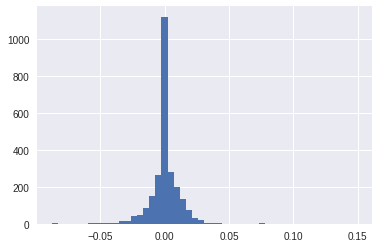

[*********************100%***********************]  1 of 1 downloaded
GOOG


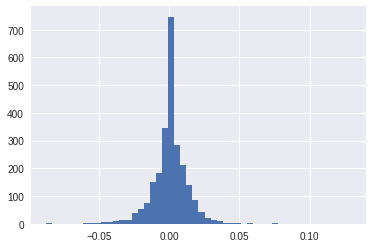

[*********************100%***********************]  1 of 1 downloaded
xlu


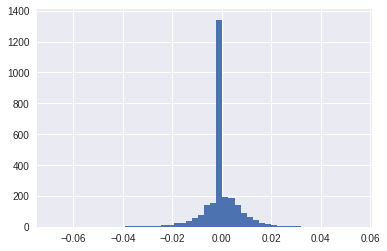

[*********************100%***********************]  1 of 1 downloaded
xlu


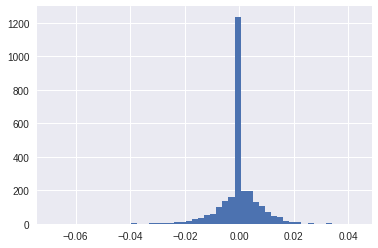

[*********************100%***********************]  1 of 1 downloaded
xlu


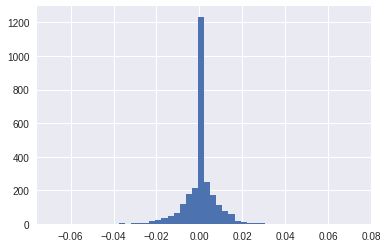

[*********************100%***********************]  1 of 1 downloaded
xlu


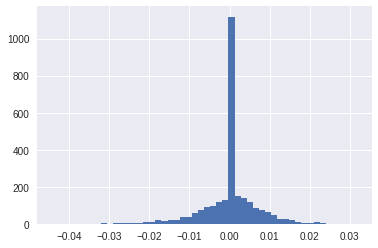

[*********************100%***********************]  1 of 1 downloaded
xlu


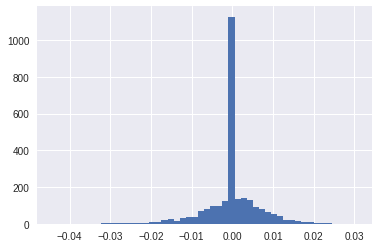

[*********************100%***********************]  1 of 1 downloaded
xlu


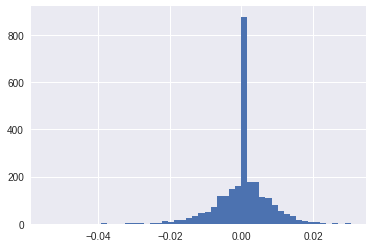

[*********************100%***********************]  1 of 1 downloaded
xlu


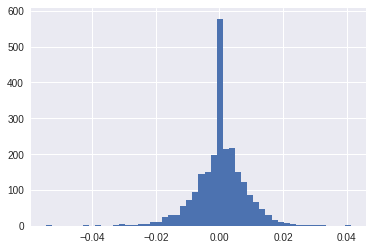

[*********************100%***********************]  1 of 1 downloaded
AAPL


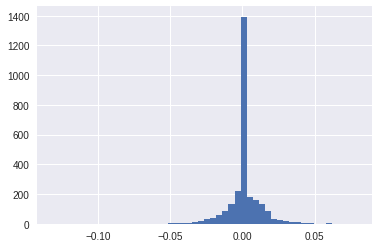

[*********************100%***********************]  1 of 1 downloaded
AAPL


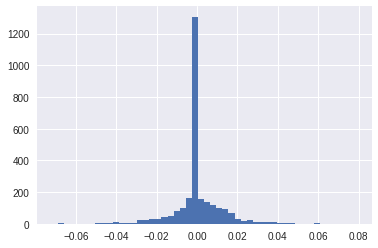

[*********************100%***********************]  1 of 1 downloaded
AAPL


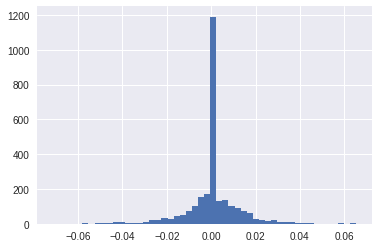

[*********************100%***********************]  1 of 1 downloaded
AAPL


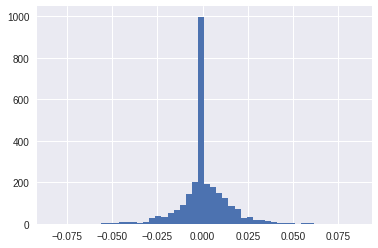

[*********************100%***********************]  1 of 1 downloaded
AAPL


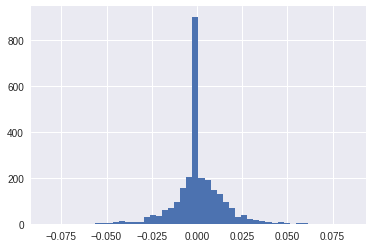

[*********************100%***********************]  1 of 1 downloaded
AAPL


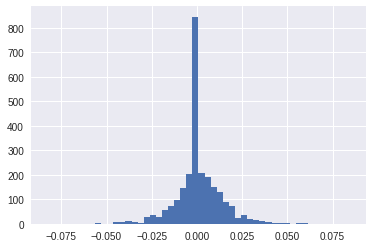

[*********************100%***********************]  1 of 1 downloaded
AAPL


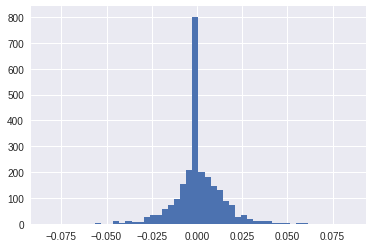

Cumulative Daily Returns


In [3]:

#Step 3: Create a portfolio of stocks and calculate the strategy performance for each stock.

portfolio = ['AAPL','KMI','F','GOOG','AMZN']
portfolio = ['MMM','GOOG','xlu','AAPL']

periodos = [ 5, 10 , 20 , 40 ,60, 110, 220]
#portfolio = ['QQQ']
#periodos = [ 5]
cum_daily_log_return = pd.DataFrame()  
for stock in portfolio:   
  for periodo in periodos:
    nombre='{}_l{}'.format(stock,periodo)
    cum_daily_log_return[nombre] = strategy_performance(stock,periodo)  

# Plot the cumulative daily returns  
print ("Cumulative Daily Returns")  
#cum_daily_log_return.plot()  
# Show the plot  
#plt.show()  

In [4]:
cum_daily_return=pd.read_pickle('20_darwins.pkl')
darwins=[x for x in cum_daily_return.columns]
darwins=darwins[1:]
darwins

['SYO.4.24',
 'TMB.4.5',
 'OVL.4.17',
 'THA.4.12',
 'ATL.4.2',
 'JMC.4.1',
 'ERQ.4.4',
 'CJN.4.4',
 'FEG.4.5',
 'XYF.4.5',
 'GTD.4.21',
 'GAF',
 'STV.4.12',
 'CLA.4.19',
 'QUA.4.3',
 'LVS.4.20',
 'NTR.4.12',
 'DLF.4.7',
 'VTJ.4.2']

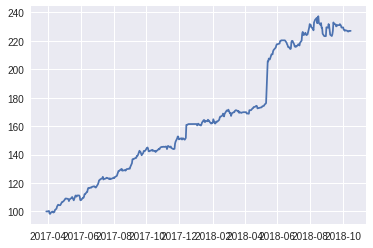

In [5]:
cum_daily_return[darwins[1]].plot()

In [0]:
cum_daily_return.index=pd.to_datetime(cum_daily_return.index)
cum_daily_return=cum_daily_return[darwins]



In [0]:
perf=cum_daily_return.dropna().calc_stats()


In [8]:
datos=[ 'total_return', 'cagr', 'max_drawdown', 'calmar', \
        'daily_sharpe', 'daily_sortino', \
        'monthly_sharpe', 'monthly_sortino', 'best_month', \
       'worst_month', 'yearly_sharpe',  'best_year', 'worst_year', \
       'avg_drawdown', 'avg_drawdown_days', 'avg_up_month', 'avg_down_month', \
       'win_year_perc', 'twelve_month_win_perc']
resultados=perf.stats.T
#print (resultados.columns)
resultados[datos][resultados.cagr>.2]


,total_return,cagr,max_drawdown,calmar,daily_sharpe,daily_sortino,monthly_sharpe,monthly_sortino,best_month,worst_month,yearly_sharpe,best_year,worst_year,avg_drawdown,avg_drawdown_days,avg_up_month,avg_down_month,win_year_perc,twelve_month_win_perc
ATL.4.2,0.554305,0.329905,-0.072502,4.55028,1.76242,3.55881,1.44028,5.32483,0.19163,-0.0616511,NaN,0.307045,0.307045,-0.0211036,18.04,0.0541172,-0.0246542,1,1
CJN.4.4,0.472745,0.284363,-0.101467,2.8025,1.59968,2.70784,1.92387,5.43767,0.132096,-0.0556167,NaN,0.231004,0.231004,-0.0225286,18.087,0.0442164,-0.0291835,1,1
CLA.4.19,0.371157,0.22637,-0.13917,1.62657,1.1569,1.92541,1.41988,3.42317,0.0945628,-0.0568644,NaN,0.105497,0.105497,-0.0311229,16.8214,0.0412829,-0.0264281,1,1
ERQ.4.4,0.576845,0.34234,-0.0727738,4.70417,2.08954,2.98948,3.2714,11.2668,0.0606123,-0.0302827,NaN,0.269012,0.269012,-0.0321518,18.2667,0.0321345,-0.0157486,1,1
FEG.4.5,0.337415,0.206774,-0.141492,1.46139,1.17479,2.60224,1.27601,2.72018,0.0994702,-0.0799383,NaN,0.138791,0.138791,-0.0352988,33.5714,0.0427943,-0.0292672,1,1
JMC.4.1,0.608566,0.359736,-0.0666116,5.4005,2.07279,3.93117,1.54046,6.88312,0.186528,-0.0460257,NaN,0.283543,0.283543,-0.0192299,22.1905,0.065554,-0.0173755,1,1
OVL.4.17,0.971475,0.550854,-0.103702,5.31188,2.78926,5.25296,2.46924,8.84555,0.128976,-0.051161,NaN,0.316025,0.316025,-0.0148411,8.25581,0.0549171,-0.0271793,1,1
QUA.4.3,0.4164,0.252379,-0.166481,1.51597,1.07308,1.53993,1.21448,2.06135,0.10614,-0.134152,NaN,0.0238451,0.0238451,-0.040402,26.6471,0.0454064,-0.0522588,1,1
SYO.4.24,1.17218,0.65116,-0.152417,4.27223,2.08204,3.66772,3.16738,8.8607,0.136478,-0.0728213,NaN,0.363833,0.363833,-0.0263778,9.975,0.0554598,-0.0258256,1,1
THA.4.12,0.700407,0.409429,-0.169193,2.41989,1.79822,3.8044,2.45456,10.105,0.105958,-0.0327289,NaN,0.0921321,0.0921321,-0.0225142,24.6667,0.045341,-0.0163527,1,1


In [9]:
resultados[datos][resultados.monthly_sharpe>.9]

,total_return,cagr,max_drawdown,calmar,daily_sharpe,daily_sortino,monthly_sharpe,monthly_sortino,best_month,worst_month,yearly_sharpe,best_year,worst_year,avg_drawdown,avg_drawdown_days,avg_up_month,avg_down_month,win_year_perc,twelve_month_win_perc
ATL.4.2,0.554305,0.329905,-0.072502,4.55028,1.76242,3.55881,1.44028,5.32483,0.19163,-0.0616511,NaN,0.307045,0.307045,-0.0211036,18.04,0.0541172,-0.0246542,1,1
CJN.4.4,0.472745,0.284363,-0.101467,2.8025,1.59968,2.70784,1.92387,5.43767,0.132096,-0.0556167,NaN,0.231004,0.231004,-0.0225286,18.087,0.0442164,-0.0291835,1,1
CLA.4.19,0.371157,0.22637,-0.13917,1.62657,1.1569,1.92541,1.41988,3.42317,0.0945628,-0.0568644,NaN,0.105497,0.105497,-0.0311229,16.8214,0.0412829,-0.0264281,1,1
ERQ.4.4,0.576845,0.34234,-0.0727738,4.70417,2.08954,2.98948,3.2714,11.2668,0.0606123,-0.0302827,NaN,0.269012,0.269012,-0.0321518,18.2667,0.0321345,-0.0157486,1,1
FEG.4.5,0.337415,0.206774,-0.141492,1.46139,1.17479,2.60224,1.27601,2.72018,0.0994702,-0.0799383,NaN,0.138791,0.138791,-0.0352988,33.5714,0.0427943,-0.0292672,1,1
GAF,0.293602,0.181067,-0.0758918,2.38586,1.10126,2.30858,1.12856,3.04653,0.107424,-0.0533926,NaN,0.112045,0.112045,-0.0331388,33.6154,0.045023,-0.0192877,1,1
GTD.4.21,0.275941,0.170618,-0.134137,1.27197,1.0556,1.73953,1.02596,2.42995,0.108119,-0.0748776,NaN,0.16685,0.16685,-0.0239724,17,0.0528888,-0.0280521,1,1
JMC.4.1,0.608566,0.359736,-0.0666116,5.4005,2.07279,3.93117,1.54046,6.88312,0.186528,-0.0460257,NaN,0.283543,0.283543,-0.0192299,22.1905,0.065554,-0.0173755,1,1
OVL.4.17,0.971475,0.550854,-0.103702,5.31188,2.78926,5.25296,2.46924,8.84555,0.128976,-0.051161,NaN,0.316025,0.316025,-0.0148411,8.25581,0.0549171,-0.0271793,1,1
QUA.4.3,0.4164,0.252379,-0.166481,1.51597,1.07308,1.53993,1.21448,2.06135,0.10614,-0.134152,NaN,0.0238451,0.0238451,-0.040402,26.6471,0.0454064,-0.0522588,1,1


In [0]:
#extre los datos en %
#cum_daily_return=np.exp(cum_daily_log_return)

In [0]:
#extrae los rendimientos de 3 meses para todas las estrategias
#rel_cum_daily_return=cum_daily_return.pct_change(60).fillna(0)

In [0]:
#plotea los 500 ultimos valores de la series
#rel_cum_daily_return[-500:].plot()

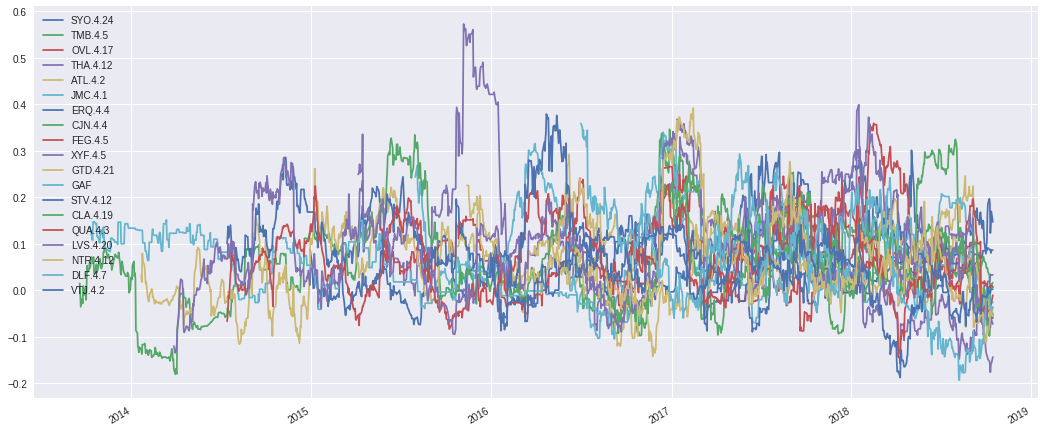

In [13]:
#plotea todos los valores
cum_daily_return.pct_change(60).plot(figsize=(18,8))

In [0]:
#cum_daily_return


In [14]:
#tenemos neutro y nada mas
"""
f1=pd.DataFrame(index=cum_daily_return.index)
l5=cum_daily_return.filter(like='neutro'.format(periodo),axis=1).columns.values
cum_daily_return[l5].plot(figsize=(16,8))
"""

"\nf1=pd.DataFrame(index=cum_daily_return.index)\nl5=cum_daily_return.filter(like='neutro'.format(periodo),axis=1).columns.values\ncum_daily_return[l5].plot(figsize=(16,8))\n"

In [0]:
#resultados

In [0]:
#cum_daily_return[resultados].tail()

In [0]:

#print (cum_daily_return.columns)
#for columna in resultados:
  
 # daily_log_return=np.log(cum_daily_return[portfolio]/cum_daily_return[portfolio].shift())

In [0]:
#print (cum_daily_return['p_AAPL_l60'])

In [0]:
#cum_daily_return['p_AAPL_l60'].tail()

In [0]:
#print (cum_daily_return['resultado_5d60p'].tail())
#print(cum_daily_return['resultado_5d110p'].value_counts())

In [0]:
#cum_daily_return

In [22]:
"""
print (portfolio)
print (resultados)
print (periodos)
print (periodos)
"""

'\nprint (portfolio)\nprint (resultados)\nprint (periodos)\nprint (periodos)\n'

In [0]:
#print (cum_daily_return['res_220d60p'].tail())
#print (periodo)

In [0]:
#cum_daily_return[l5]

In [25]:
"""
cum_daily_return['serie_res_110d60p'].plot()
cum_daily_return[portfolio_grupo[220]['periodo']].pct_change(60).plot()
"""


"\ncum_daily_return['serie_res_110d60p'].plot()\ncum_daily_return[portfolio_grupo[220]['periodo']].pct_change(60).plot()\n"

In [26]:
"""
f1=pd.DataFrame(index=cum_daily_return.index)
l5=cum_daily_return.filter(like='serie_res_5'.format(periodo),axis=1).columns.values
cum_daily_return[l5].plot(figsize=(16,8))
"""

"\nf1=pd.DataFrame(index=cum_daily_return.index)\nl5=cum_daily_return.filter(like='serie_res_5'.format(periodo),axis=1).columns.values\ncum_daily_return[l5].plot(figsize=(16,8))\n"

In [27]:
"""
f1=pd.DataFrame(index=cum_daily_return.index)
l5=cum_daily_return.filter(like='serie_res_10'.format(periodo),axis=1).columns.values
cum_daily_return[l5].plot(figsize=(16,8))
"""


"\nf1=pd.DataFrame(index=cum_daily_return.index)\nl5=cum_daily_return.filter(like='serie_res_10'.format(periodo),axis=1).columns.values\ncum_daily_return[l5].plot(figsize=(16,8))\n"

In [28]:
"""
f1=pd.DataFrame(index=cum_daily_return.index)
l5=cum_daily_return.filter(like='serie_res_20'.format(periodo),axis=1).columns.values
cum_daily_return[l5].plot(figsize=(16,8))
"""

"\nf1=pd.DataFrame(index=cum_daily_return.index)\nl5=cum_daily_return.filter(like='serie_res_20'.format(periodo),axis=1).columns.values\ncum_daily_return[l5].plot(figsize=(16,8))\n"

In [29]:
"""
f1=pd.DataFrame(index=cum_daily_return.index)
l5=cum_daily_return.filter(like='serie_res_60'.format(periodo),axis=1).columns.values
cum_daily_return[l5].plot(figsize=(16,8))
"""

"\nf1=pd.DataFrame(index=cum_daily_return.index)\nl5=cum_daily_return.filter(like='serie_res_60'.format(periodo),axis=1).columns.values\ncum_daily_return[l5].plot(figsize=(16,8))\n"

In [30]:
"""
f1=pd.DataFrame(index=cum_daily_return.index)
l5=cum_daily_return.filter(like='serie_res_110'.format(periodo),axis=1).columns.values
cum_daily_return[l5].plot(figsize=(16,8))
"""

"\nf1=pd.DataFrame(index=cum_daily_return.index)\nl5=cum_daily_return.filter(like='serie_res_110'.format(periodo),axis=1).columns.values\ncum_daily_return[l5].plot(figsize=(16,8))\n"

In [31]:
"""
f1=pd.DataFrame(index=cum_daily_return.index)
l5=cum_daily_return.filter(like='serie_res_220'.format(periodo),axis=1).columns.values
cum_daily_return[l5].plot(figsize=(16,8))
"""

"\nf1=pd.DataFrame(index=cum_daily_return.index)\nl5=cum_daily_return.filter(like='serie_res_220'.format(periodo),axis=1).columns.values\ncum_daily_return[l5].plot(figsize=(16,8))\n"

In [0]:
#perf.display_monthly_returns()

In [0]:
datos=[ 'total_return', 'cagr', 'max_drawdown', 'calmar', \
        'daily_sharpe', 'daily_sortino', \
        'monthly_sharpe', 'monthly_sortino', 'best_month', \
       'worst_month', 'yearly_sharpe',  'best_year', 'worst_year', \
       'avg_drawdown', 'avg_drawdown_days', 'avg_up_month', 'avg_down_month', \
       'win_year_perc', 'twelve_month_win_perc']

In [34]:
"""
cum_daily_return['res_5d60p']=0
cum_daily_return['res_5d60p']=np.where(cum_daily_return['resultado_60d60p'].shift()=='AMZN_l60',cum_daily_return['p_AMZN_l60'],cum_daily_return['res_5d60p'])
cum_daily_return['res_5d60p']=np.where(cum_daily_return['resultado_60d60p'].shift()=='F_l60',cum_daily_return['p_F_l60'],cum_daily_return['res_5d60p'])
cum_daily_return['res_5d60p']=np.where(cum_daily_return['resultado_60d60p'].shift()=='GOOG_l60',cum_daily_return['p_GOOG_l60'],cum_daily_return['res_5d60p'])
cum_daily_return['res_5d60p']=np.where(cum_daily_return['resultado_60d60p'].shift()=='AAPL_l60',cum_daily_return['p_AAPL_l60'],cum_daily_return['res_5d60p'])
cum_daily_return['res_5d60p']=np.where(cum_daily_return['resultado_60d60p'].shift()=='KMI_l60',cum_daily_return['p_KMI_l60'],cum_daily_return['res_5d60p'])
"""

"\ncum_daily_return['res_5d60p']=0\ncum_daily_return['res_5d60p']=np.where(cum_daily_return['resultado_60d60p'].shift()=='AMZN_l60',cum_daily_return['p_AMZN_l60'],cum_daily_return['res_5d60p'])\ncum_daily_return['res_5d60p']=np.where(cum_daily_return['resultado_60d60p'].shift()=='F_l60',cum_daily_return['p_F_l60'],cum_daily_return['res_5d60p'])\ncum_daily_return['res_5d60p']=np.where(cum_daily_return['resultado_60d60p'].shift()=='GOOG_l60',cum_daily_return['p_GOOG_l60'],cum_daily_return['res_5d60p'])\ncum_daily_return['res_5d60p']=np.where(cum_daily_return['resultado_60d60p'].shift()=='AAPL_l60',cum_daily_return['p_AAPL_l60'],cum_daily_return['res_5d60p'])\ncum_daily_return['res_5d60p']=np.where(cum_daily_return['resultado_60d60p'].shift()=='KMI_l60',cum_daily_return['p_KMI_l60'],cum_daily_return['res_5d60p'])\n"

In [0]:
seleccion = [x for x in resultados[datos][resultados.monthly_sharpe>.9].T]

In [36]:
print (seleccion)

['ATL.4.2', 'CJN.4.4', 'CLA.4.19', 'ERQ.4.4', 'FEG.4.5', 'GAF', 'GTD.4.21', 'JMC.4.1', 'OVL.4.17', 'QUA.4.3', 'STV.4.12', 'SYO.4.24', 'THA.4.12', 'TMB.4.5', 'XYF.4.5']


In [0]:
#1.- calculamos los retoenos en log

cum_diario_log_retornos = pd.DataFrame()  
for stock in seleccion:     

    nombre='{}_l'.format(stock)
    cum_diario_log_retornos[nombre] =    np.log(cum_daily_return[stock]/cum_daily_return[stock].shift(1))


In [38]:
cum_diario_log_retornos.head()


,ATL.4.2_l,CJN.4.4_l,CLA.4.19_l,ERQ.4.4_l,FEG.4.5_l,GAF_l,GTD.4.21_l,JMC.4.1_l,OVL.4.17_l,QUA.4.3_l,STV.4.12_l,SYO.4.24_l,THA.4.12_l,TMB.4.5_l,XYF.4.5_l
2013-06-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-06-27,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-06-28,NaN,0.023521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-01,NaN,0.002926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-02,NaN,0.013446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
periodos = [ 5, 10 , 20 , 40 ,60, 110, 220]

cum_diario=cum_daily_return[seleccion]
resultados= []
for periodo in periodos:
    nombre='suma_{}p'.format(periodo)
    resultados.append(nombre)
    cum_daily_return[nombre]=cum_daily_return[seleccion].pct_change(periodo).apply(lambda x: x.argmax(), axis=1)
    #hay que poner el pct_change

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  


In [40]:
cum_daily_return[resultados]

,suma_5p,suma_10p,suma_20p,suma_40p,suma_60p,suma_110p,suma_220p
2013-06-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-06-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-06-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-03,CJN.4.4,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-04,CJN.4.4,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-05,CJN.4.4,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-08,CJN.4.4,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-09,CJN.4.4,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
for periodo in periodos:
    nombre='sumatorio_{}p'.format(periodo)
    nombre2='suma_{}p'.format(periodo)
    cum_daily_return[nombre]=np.zeros(len(cum_daily_return))

    for numbre in seleccion:
      nombre3='{}'.format(numbre)
      nombre4='{}_l'.format(numbre)
      cum_daily_return[nombre]=np.where(cum_daily_return[nombre2].shift()==nombre3,cum_diario_log_retornos[nombre4],cum_daily_return[nombre])


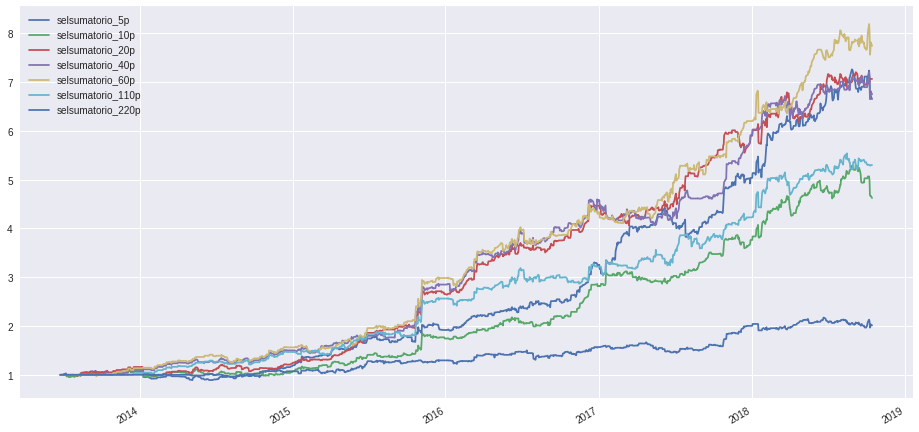

In [42]:
selsuma=[x for x  in cum_daily_return.filter(like='sumatorio',axis=1).columns]
selsumados=[ 'sel{}'.format(x) for x  in cum_daily_return.filter(like='sumatorio',axis=1).columns]

for row in selsuma:
  cum_daily_return['sel{}'.format(row)]=np.exp(cum_daily_return[row].cumsum().fillna(0))
  
cum_daily_return[selsumados].plot(figsize=(16,8))

In [43]:
perf=cum_daily_return[selsumados].calc_stats()


/usr/local/lib/python3.6/dist-packages/ffn/core.py:2056: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


In [44]:
resultados=perf.stats.T
#print (resultados.columns)
resultados[datos][resultados.cagr>.2]


,total_return,cagr,max_drawdown,calmar,daily_sharpe,daily_sortino,monthly_sharpe,monthly_sortino,best_month,worst_month,yearly_sharpe,best_year,worst_year,avg_drawdown,avg_drawdown_days,avg_up_month,avg_down_month,win_year_perc,twelve_month_win_perc
selsumatorio_10p,3.62547,0.334827,-0.134961,2.48092,1.64223,2.837,1.79251,4.3785,0.148405,-0.106953,1.28988,0.650803,-0.0227518,-0.025563,22.2857,0.0505732,-0.0300455,0.8,0.944444
selsumatorio_110p,4.29995,0.369532,-0.101574,3.63805,1.81673,3.46474,1.89397,7.1473,0.187401,-0.0778283,1.9282,0.745602,0.253598,-0.0247487,18.4247,0.0477048,-0.0166962,1,1
selsumatorio_20p,6.06659,0.445876,-0.15352,2.90435,2.09989,3.80159,2.1211,4.8142,0.187401,-0.149582,1.09321,1.15958,0.0599674,-0.019522,16.1364,0.0498124,-0.0360615,1,1
selsumatorio_40p,5.74959,0.433417,-0.116067,3.73419,2.08299,4.06556,2.08485,7.81439,0.202545,-0.0816468,1.5441,0.900041,0.141216,-0.0218303,18.1154,0.0505676,-0.0209877,1,1
selsumatorio_5p,5.65263,0.429511,-0.188341,2.2805,1.86054,3.23681,1.98625,4.72034,0.167781,-0.134333,1.8857,0.697791,0.105226,-0.0230956,17.3068,0.0559364,-0.0309436,1,0.907407
selsumatorio_60p,6.74294,0.471012,-0.117589,4.00559,2.21703,4.41003,2.22072,8.0881,0.196334,-0.0691427,1.92902,0.909171,0.248511,-0.0209945,16.5513,0.0539937,-0.0220894,1,1


In [45]:
resultados[datos][resultados.monthly_sharpe>.9]

,total_return,cagr,max_drawdown,calmar,daily_sharpe,daily_sortino,monthly_sharpe,monthly_sortino,best_month,worst_month,yearly_sharpe,best_year,worst_year,avg_drawdown,avg_drawdown_days,avg_up_month,avg_down_month,win_year_perc,twelve_month_win_perc
selsumatorio_10p,3.62547,0.334827,-0.134961,2.48092,1.64223,2.837,1.79251,4.3785,0.148405,-0.106953,1.28988,0.650803,-0.0227518,-0.025563,22.2857,0.0505732,-0.0300455,0.8,0.944444
selsumatorio_110p,4.29995,0.369532,-0.101574,3.63805,1.81673,3.46474,1.89397,7.1473,0.187401,-0.0778283,1.9282,0.745602,0.253598,-0.0247487,18.4247,0.0477048,-0.0166962,1,1
selsumatorio_20p,6.06659,0.445876,-0.15352,2.90435,2.09989,3.80159,2.1211,4.8142,0.187401,-0.149582,1.09321,1.15958,0.0599674,-0.019522,16.1364,0.0498124,-0.0360615,1,1
selsumatorio_220p,1.01447,0.14118,-0.131203,1.07605,0.954507,1.49298,1.07473,2.40596,0.133956,-0.0981689,1.38212,0.278113,0.00533999,-0.0248552,26.451,0.0379701,-0.0162908,1,0.925926
selsumatorio_40p,5.74959,0.433417,-0.116067,3.73419,2.08299,4.06556,2.08485,7.81439,0.202545,-0.0816468,1.5441,0.900041,0.141216,-0.0218303,18.1154,0.0505676,-0.0209877,1,1
selsumatorio_5p,5.65263,0.429511,-0.188341,2.2805,1.86054,3.23681,1.98625,4.72034,0.167781,-0.134333,1.8857,0.697791,0.105226,-0.0230956,17.3068,0.0559364,-0.0309436,1,0.907407
selsumatorio_60p,6.74294,0.471012,-0.117589,4.00559,2.21703,4.41003,2.22072,8.0881,0.196334,-0.0691427,1.92902,0.909171,0.248511,-0.0209945,16.5513,0.0539937,-0.0220894,1,1


In [46]:
resultados[datos][resultados.win_year_perc==1]

,total_return,cagr,max_drawdown,calmar,daily_sharpe,daily_sortino,monthly_sharpe,monthly_sortino,best_month,worst_month,yearly_sharpe,best_year,worst_year,avg_drawdown,avg_drawdown_days,avg_up_month,avg_down_month,win_year_perc,twelve_month_win_perc
selsumatorio_110p,4.29995,0.369532,-0.101574,3.63805,1.81673,3.46474,1.89397,7.1473,0.187401,-0.0778283,1.9282,0.745602,0.253598,-0.0247487,18.4247,0.0477048,-0.0166962,1,1
selsumatorio_20p,6.06659,0.445876,-0.15352,2.90435,2.09989,3.80159,2.1211,4.8142,0.187401,-0.149582,1.09321,1.15958,0.0599674,-0.019522,16.1364,0.0498124,-0.0360615,1,1
selsumatorio_220p,1.01447,0.14118,-0.131203,1.07605,0.954507,1.49298,1.07473,2.40596,0.133956,-0.0981689,1.38212,0.278113,0.00533999,-0.0248552,26.451,0.0379701,-0.0162908,1,0.925926
selsumatorio_40p,5.74959,0.433417,-0.116067,3.73419,2.08299,4.06556,2.08485,7.81439,0.202545,-0.0816468,1.5441,0.900041,0.141216,-0.0218303,18.1154,0.0505676,-0.0209877,1,1
selsumatorio_5p,5.65263,0.429511,-0.188341,2.2805,1.86054,3.23681,1.98625,4.72034,0.167781,-0.134333,1.8857,0.697791,0.105226,-0.0230956,17.3068,0.0559364,-0.0309436,1,0.907407
selsumatorio_60p,6.74294,0.471012,-0.117589,4.00559,2.21703,4.41003,2.22072,8.0881,0.196334,-0.0691427,1.92902,0.909171,0.248511,-0.0209945,16.5513,0.0539937,-0.0220894,1,1


In [47]:
for n in selsumados:
  print('******',n,'*******\n\n')
  perf[n].display_monthly_returns()
  print('\n\n')
        
  

****** selsumatorio_5p *******


  Year     Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec    YTD
------  ------  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----
  2013    0      0      0      0      0      0     -1.39   7.04  -0.95   1.29   1.39  -0.78   6.53
  2014  -13.43   4.08   1.13  -7.19   1.95  -1.36   7.5    3.67  -0.05   6.85   4.64   4.35  10.52
  2015   15.5    1.33   3.01   8.25   2.32  11.03  -1.9   -1.94   6.78   6.41   5.93  -5.09  62.91
  2016    3.09   8.76   3.24   2.59   2.02   1.76   3.83  -1.58   3.73   5.03   9.01  13.49  69.78
  2017    1.47  16.78   4.4   -0.02   7.02  -4.71  -6.79   5.2    6.26  13.29   4.33  -0.43  54.68
  2018    4.75  13.01   4.18   1.31  -0.92   9.15   1.73   3.46  -0.67  -6.5    0      0     32.07



****** selsumatorio_10p *******


  Year     Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec    YTD
------  ------  -----  -----  -----  --

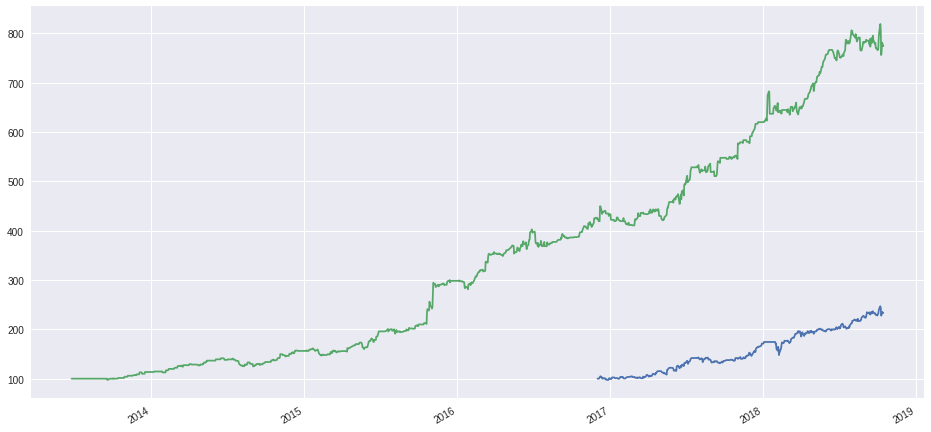

In [48]:
cum_daily_return['SYO.4.24'].plot(figsize=(16,8))
pepe=cum_daily_return['selsumatorio_60p']*100
pepe.plot()

In [49]:
perfo=cum_daily_return[darwins].fillna(0).calc_stats()


/usr/local/lib/python3.6/dist-packages/ffn/core.py:207: RuntimeWarning: divide by zero encountered in double_scalars
  self.total_return = obj[-1] / obj[0] - 1
/usr/local/lib/python3.6/dist-packages/ffn/core.py:1223: RuntimeWarning: divide by zero encountered in double_scalars
  return (prices.iloc[-1] / prices.iloc[0]) ** (1 / year_frac(start, end)) - 1
/usr/local/lib/python3.6/dist-packages/ffn/core.py:273: RuntimeWarning: invalid value encountered in double_scalars
  self.return_table[fidx.year][fidx.month] = float(mp[0]) / dp[0] - 1
/usr/local/lib/python3.6/dist-packages/ffn/core.py:342: RuntimeWarning: invalid value encountered in double_scalars
  if mp[i] / mp[i - 11] > 1:
/usr/local/lib/python3.6/dist-packages/ffn/core.py:342: RuntimeWarning: divide by zero encountered in double_scalars
  if mp[i] / mp[i - 11] > 1:
/usr/local/lib/python3.6/dist-packages/ffn/core.py:2056: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


In [50]:

for n in darwins:
  print('******',n,'*******\n\n')
  perfo[n].display_monthly_returns()
  print('\n\n')



****** SYO.4.24 *******


  Year    Jan    Feb    Mar    Apr    May  Jun      Jul    Aug    Sep    Oct    Nov     Dec  YTD
------  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  ------  -----
  2013   0      0      0      0      0     -       0      0      0      0      0       0     -
  2014   0      0      0      0      0     0.00    0      0      0      0      0       0     0.00
  2015   0      0      0      0      0     0.00    0      0      0      0      0       0     0.00
  2016   0      0      0      0      0     0.00    0      0      0      0      0     inf     inf
  2017   2.72  -0.1    3.76   7.17   5.26  8.66    8.61  -7.28   2.51   4.26   6.14   13.65  69.45
  2018  -0.17   3.44  10.94  -0.3    0.13  3.73    4.66   5.59   2.31   1.67   0       0     36.38



****** TMB.4.5 *******


  Year    Jan    Feb    Mar    Apr    May  Jun      Jul    Aug    Sep    Oct    Nov    Dec  YTD
------  -----  -----  -----  -----  -----  -----  -----  -----  ----

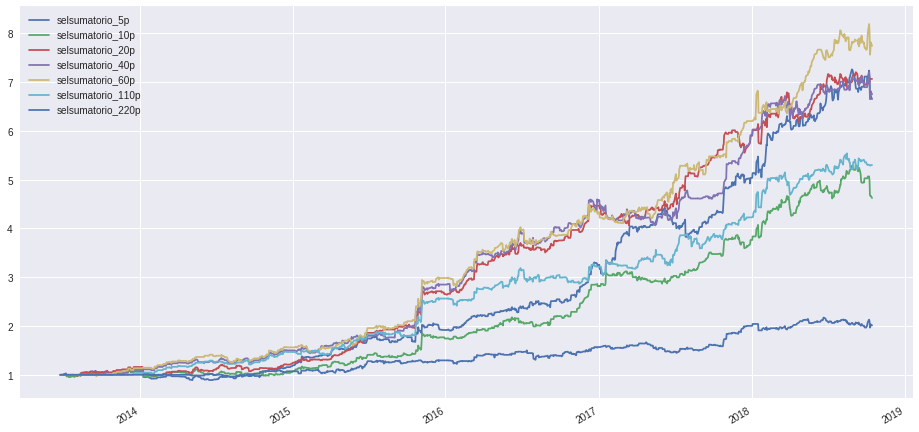

In [51]:
cum_daily_return[selsumados].plot(figsize=(16,8))        
  

In [52]:
cum_daily_return[selsumados].tail()

,selsumatorio_5p,selsumatorio_10p,selsumatorio_20p,selsumatorio_40p,selsumatorio_60p,selsumatorio_110p,selsumatorio_220p
2018-10-09,7.113846,4.980653,7.000605,7.082133,8.051967,5.298318,2.094874
2018-10-10,6.680998,4.677601,7.078856,6.651214,7.562038,5.289680,1.967410
2018-10-11,6.669417,4.669493,7.066586,6.651214,7.630084,5.289914,1.985113
2018-10-12,6.717871,4.669493,7.066586,6.813827,7.816628,5.299952,2.033646
2018-10-15,6.652630,4.625473,7.066586,6.749592,7.742940,5.299952,2.014475


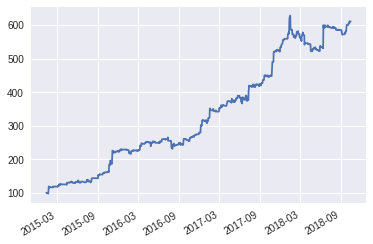

In [53]:
cum_daily_return['THA.4.12'].plot()

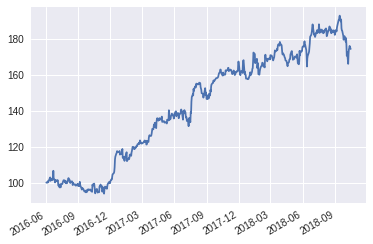

In [54]:
cum_daily_return['CLA.4.19'].plot()

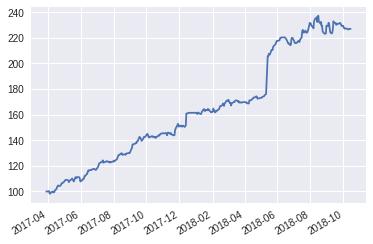

In [55]:
cum_daily_return['TMB.4.5'].plot()

In [56]:
cum_daily_return[selsumados].pct_change().tail(10)

,selsumatorio_5p,selsumatorio_10p,selsumatorio_20p,selsumatorio_40p,selsumatorio_60p,selsumatorio_110p,selsumatorio_220p
2018-10-02,0.000000,0.000000,0.000000,0.000000,0.000000,-0.005969,0.012542
2018-10-03,0.000000,0.000000,0.000000,0.000000,0.002858,-0.002586,0.002858
2018-10-04,-0.020986,0.000000,0.000000,0.005434,0.025738,-0.001934,0.025738
2018-10-05,0.017135,0.007698,0.007698,0.017135,0.017135,0.001761,0.017135
2018-10-08,0.021565,0.000000,0.000000,0.021565,0.021565,-0.001451,0.021565
2018-10-09,-0.017099,-0.017099,0.000000,-0.017099,-0.017099,-0.000968,-0.017099
2018-10-10,-0.060846,-0.060846,0.011178,-0.060846,-0.060846,-0.001630,-0.060846
2018-10-11,-0.001733,-0.001733,-0.001733,0.000000,0.008998,0.000044,0.008998
2018-10-12,0.007265,0.000000,0.000000,0.024449,0.024449,0.001898,0.024449
2018-10-15,-0.009711,-0.009427,0.000000,-0.009427,-0.009427,0.000000,-0.009427


In [57]:
print(cum_daily_return['SYO.4.24'].pct_change().tail(10),cum_daily_return['SYO.4.24'].tail(10))

2018-10-02    0.012542
2018-10-03    0.002858
2018-10-04    0.025738
2018-10-05    0.017135
2018-10-08    0.021565
2018-10-09   -0.017099
2018-10-10   -0.060846
2018-10-11    0.008998
2018-10-12    0.024449
2018-10-15   -0.009427
Name: SYO.4.24, dtype: float64 2018-10-02    230.90
2018-10-03    231.56
2018-10-04    237.52
2018-10-05    241.59
2018-10-08    246.80
2018-10-09    242.58
2018-10-10    227.82
2018-10-11    229.87
2018-10-12    235.49
2018-10-15    233.27
Name: SYO.4.24, dtype: float64


In [58]:
print(cum_daily_return['selsumatorio_60p'].pct_change().tail(10),cum_daily_return['selsumatorio_60p'].tail(10)*100)

2018-10-02    0.000000
2018-10-03    0.002858
2018-10-04    0.025738
2018-10-05    0.017135
2018-10-08    0.021565
2018-10-09   -0.017099
2018-10-10   -0.060846
2018-10-11    0.008998
2018-10-12    0.024449
2018-10-15   -0.009427
Name: selsumatorio_60p, dtype: float64 2018-10-02    766.427238
2018-10-03    768.617979
2018-10-04    788.401029
2018-10-05    801.910596
2018-10-08    819.204168
2018-10-09    805.196706
2018-10-10    756.203783
2018-10-11    763.008355
2018-10-12    781.662843
2018-10-15    774.293988
Name: selsumatorio_60p, dtype: float64
